
[a1] Loading data and imputing missing values...
[a1] Data loaded and missing values filled.

[a3] Training Linear Regression model and evaluating performance...
[a3] Model training and evaluation done.

Single Feature Regression (Year_Birth predicting Income):
Train Metrics:
  MSE: 687353022.1515
  RMSE: 26217.4183
  MAE: 17484.1487
  MAPE: 0.5276
  R2: 0.0282

Test Metrics:
  MSE: 431583917.5187
  RMSE: 20774.5979
  MAE: 17280.9849
  MAPE: 0.4842
  R2: 0.0141

[a3] Training Linear Regression model and evaluating performance...
[a3] Model training and evaluation done.

Multi-Feature Regression (predicting Income):
Train Metrics:
  MSE: 365396577.9691
  RMSE: 19115.3493
  MAE: 7614.7853
  MAPE: 0.2415
  R2: 0.4834

Test Metrics:
  MSE: 106702003.6036
  RMSE: 10329.6662
  MAE: 7223.4233
  MAPE: 0.2239
  R2: 0.7562

[a4] Performing KMeans clustering with k=2...
[a4] Clustering completed for k=2.

KMeans Clustering (k=2):
Cluster Labels: [1 0 1 ... 1 1 0]
Cluster Centers (scaled):
 [[ 0.

/tmp/ipython-input-412636202.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


[a4] Clustering completed for k=2.

[a4] Performing KMeans clustering with k=3...
[a4] Clustering completed for k=3.

[a4] Performing KMeans clustering with k=4...
[a4] Clustering completed for k=4.

[a4] Performing KMeans clustering with k=5...
[a4] Clustering completed for k=5.

[a4] Performing KMeans clustering with k=6...
[a4] Clustering completed for k=6.

[a4] Performing KMeans clustering with k=7...
[a4] Clustering completed for k=7.

[a4] Performing KMeans clustering with k=8...
[a4] Clustering completed for k=8.

[a4] Performing KMeans clustering with k=9...
[a4] Clustering completed for k=9.

[a4] Performing KMeans clustering with k=10...
[a4] Clustering completed for k=10.



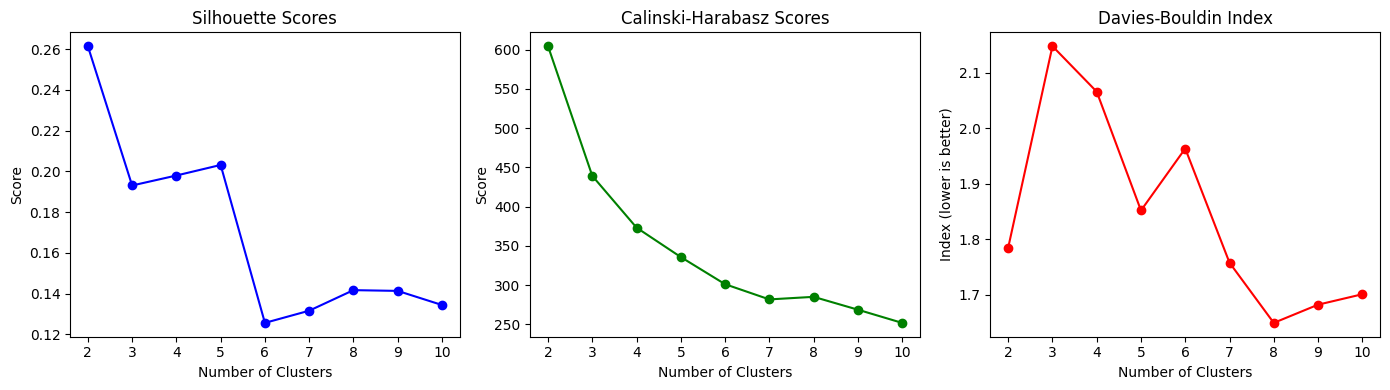

[a6] Cluster quality evaluation and plots done.

[a7] Generating elbow plot to determine optimal number of clusters...


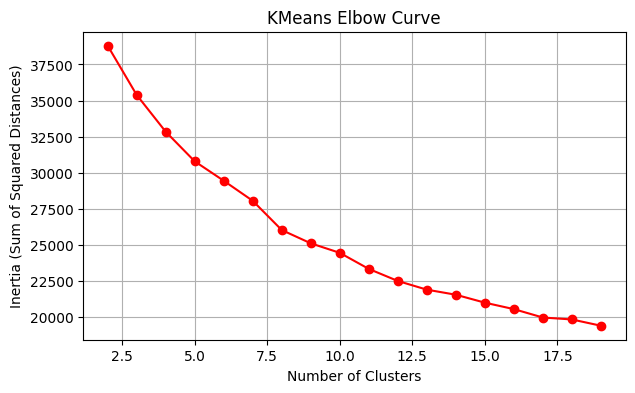

[a7] Elbow plot displayed.



In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# a1: Data Loading and Imputation
def a1_load_and_impute(filepath):
    print("\n[a1] Loading data and imputing missing values...")
    df = pd.read_csv(filepath)
    numeric_cols = df.select_dtypes(include=np.number).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    print("[a1] Data loaded and missing values filled.\n")
    return df


# a2: Custom MAPE calculation
def a2_calculate_mape(actual_vals, predicted_vals):
    # No print needed here as it's just a metric calculation function
    tiny_val = 1e-10
    return np.mean(np.abs((actual_vals - predicted_vals) / (np.abs(actual_vals) + tiny_val)))


# a3: Linear Regression Training & Evaluation (single or multi-feature)
def a3_linear_regression_eval(X_tr, X_te, y_tr, y_te):
    print("[a3] Training Linear Regression model and evaluating performance...")
    model = LinearRegression()
    model.fit(X_tr, y_tr)

    y_tr_pred = model.predict(X_tr)
    y_te_pred = model.predict(X_te)

    metrics_list = []
    for dataset, y_true, y_pred in [("train", y_tr, y_tr_pred), ("test", y_te, y_te_pred)]:
        mse = mean_squared_error(y_true, y_pred)
        metrics_list.append({
            "dataset": dataset,
            "MSE": mse,
            "RMSE": np.sqrt(mse),
            "MAE": mean_absolute_error(y_true, y_pred),
            "MAPE": a2_calculate_mape(y_true, y_pred),
            "R2": r2_score(y_true, y_pred)
        })
    print("[a3] Model training and evaluation done.\n")
    return metrics_list


# a4: KMeans Clustering and centroid calculation
def a4_perform_kmeans(X_data, k=2):
    print(f"[a4] Performing KMeans clustering with k={k}...")
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    clusters = kmeans.fit_predict(X_data)
    centers = kmeans.cluster_centers_
    print(f"[a4] Clustering completed for k={k}.\n")
    return clusters, centers


# a5: Clustering quality metrics computation
def a5_clustering_metrics(X_data, cluster_labels):
    print("[a5] Computing clustering quality metrics...")
    silhouette = silhouette_score(X_data, cluster_labels)
    calinski = calinski_harabasz_score(X_data, cluster_labels)
    davies = davies_bouldin_score(X_data, cluster_labels)
    print("[a5] Clustering metrics computed.\n")
    return {
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Score": calinski,
        "Davies-Bouldin Index": davies
    }


# a6: Evaluate cluster quality across multiple k and plot scores
def a6_evaluate_clusters_range(X_data, cluster_range):
    print("[a6] Evaluating clustering metrics for multiple cluster counts...")
    sil_scores = []
    ch_scores = []
    db_scores = []

    for k in cluster_range:
        labels, _ = a4_perform_kmeans(X_data, k)
        sil_scores.append(silhouette_score(X_data, labels))
        ch_scores.append(calinski_harabasz_score(X_data, labels))
        db_scores.append(davies_bouldin_score(X_data, labels))

    fig, axes = plt.subplots(1, 3, figsize=(14, 4))

    axes[0].plot(cluster_range, sil_scores, 'bo-')
    axes[0].set_title("Silhouette Scores")
    axes[0].set_xlabel("Number of Clusters")
    axes[0].set_ylabel("Score")

    axes[1].plot(cluster_range, ch_scores, 'go-')
    axes[1].set_title("Calinski-Harabasz Scores")
    axes[1].set_xlabel("Number of Clusters")
    axes[1].set_ylabel("Score")

    axes[2].plot(cluster_range, db_scores, 'ro-')
    axes[2].set_title("Davies-Bouldin Index")
    axes[2].set_xlabel("Number of Clusters")
    axes[2].set_ylabel("Index (lower is better)")

    plt.tight_layout()
    plt.show()
    print("[a6] Cluster quality evaluation and plots done.\n")


# a7: Plot elbow curve for KMeans inertia to determine optimal clusters
def a7_plot_elbow_curve(X_data, cluster_range):
    print("[a7] Generating elbow plot to determine optimal number of clusters...")
    inertias = []
    for k in cluster_range:
        model = KMeans(n_clusters=k, n_init=10, random_state=0)
        model.fit(X_data)
        inertias.append(model.inertia_)

    plt.figure(figsize=(7, 4))
    plt.plot(cluster_range, inertias, 'ro-')
    plt.title("KMeans Elbow Curve")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia (Sum of Squared Distances)")
    plt.grid(True)
    plt.show()
    print("[a7] Elbow plot displayed.\n")


def main():
    data = a1_load_and_impute("MC.csv")

    # Single feature regression: Year_Birth → Income
    X_single = data[["Year_Birth"]]
    y_target = data["Income"]

    X_tr_s, X_te_s, y_tr_s, y_te_s = train_test_split(X_single, y_target, test_size=0.3, random_state=42)
    single_metrics = a3_linear_regression_eval(X_tr_s, X_te_s, y_tr_s, y_te_s)

    print("Single Feature Regression (Year_Birth predicting Income):")
    for res in single_metrics:
        print(f"{res['dataset'].capitalize()} Metrics:")
        for metric, val in res.items():
            if metric != "dataset":
                print(f"  {metric}: {val:.4f}")
        print()

    # Multi-feature regression: multiple numeric features → Income
    numeric_feats = data.select_dtypes(include=np.number).drop(columns=["Income"])
    X_tr_m, X_te_m, y_tr_m, y_te_m = train_test_split(numeric_feats, y_target, test_size=0.3, random_state=42)
    multi_metrics = a3_linear_regression_eval(X_tr_m, X_te_m, y_tr_m, y_te_m)

    print("Multi-Feature Regression (predicting Income):")
    for res in multi_metrics:
        print(f"{res['dataset'].capitalize()} Metrics:")
        for metric, val in res.items():
            if metric != "dataset":
                print(f"  {metric}: {val:.4f}")
        print()

    # Prepare data for clustering (remove target and possibly ID)
    cluster_features = data.select_dtypes(include=np.number).drop(columns=["Income"])
    if "ID" in cluster_features.columns:
        cluster_features.drop(columns=["ID"], inplace=True)

    scaler = StandardScaler()
    scaled_feats = scaler.fit_transform(cluster_features)

    # KMeans clustering k=2
    cluster_labels, cluster_centers = a4_perform_kmeans(scaled_feats, k=2)
    print("KMeans Clustering (k=2):")
    print("Cluster Labels:", cluster_labels)
    print("Cluster Centers (scaled):\n", cluster_centers)

    cluster_scores = a5_clustering_metrics(scaled_feats, cluster_labels)
    print("\nClustering Metrics:")
    for key, value in cluster_scores.items():
        print(f"  {key}: {value:.4f}")

    # Evaluate clusters for range k=2 to 10
    a6_evaluate_clusters_range(scaled_feats, range(2, 11))

    # Plot elbow curve for k=2 to 19
    a7_plot_elbow_curve(scaled_feats, range(2, 20))


if __name__ == "__main__":
    main()
